<a href="https://colab.research.google.com/github/prasa12/MyPython-Stuff/blob/master/Pytorch/Pytorch_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Computer vision

## 0. Computer Vision libraries for Pytorch

* [' torchvision'] - base domain library for Pytorch computer Vision
* ' torchvision.datasets' - get datasets and data loading functions for computer vision for your own problems
* 'torchvision.transforms' - functions for manipulating your vision data (images) to be suitable for use with ML model
* ' torch.utils.data.DataLoader'- Creates a Python iterable over a dataset
* ' torch.utils.data.Dataset' - Base dataset class for Pytorch

In [47]:
# Import Pytorch
import torch
from torch import nn

# Import torch vision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


# Getting datasets
The dataset we will be using is Fashion MNIST

In [48]:
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [49]:
len(train_data), len(test_data)

(60000, 10000)

In [50]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [51]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [52]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [53]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [54]:
image.shape, label


(torch.Size([1, 28, 28]), 9)

## 1.2 Visualizing our data

Label: 9, Class: Ankle boot


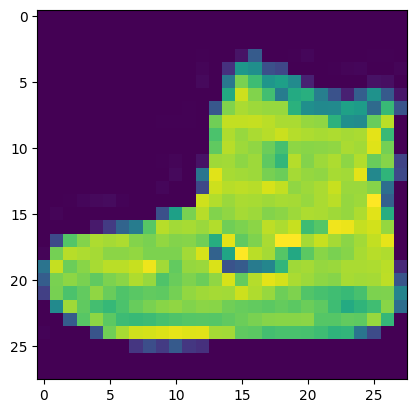

In [55]:
import matplotlib.pyplot as plt
plt.imshow(image.squeeze())
print(f'Label: {label}, Class: {class_names[label]}')

Label: 9, Class: Ankle boot


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

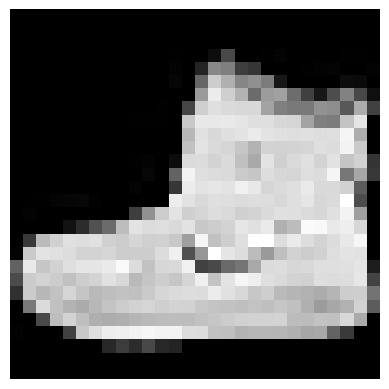

In [56]:
plt.imshow(image.squeeze(), cmap='gray')
print(f'Label: {label}, Class: {class_names[label]}')
plt.axis('off')

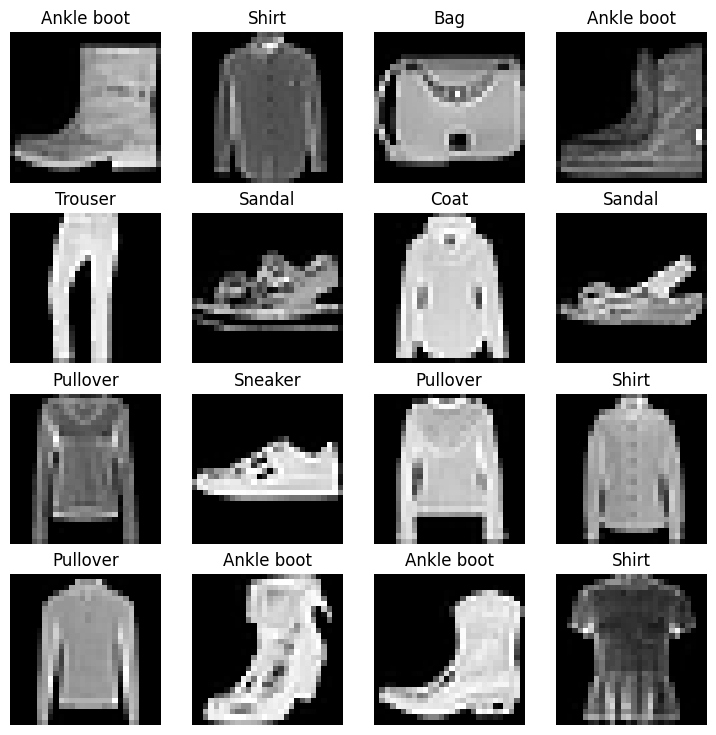

In [57]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(class_names[label])


Do you thnk the items of clothing could be modelled with pure linear lined

In [58]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of Pytorch Datasets

DataLoader,turns our data into batches ( or mini batches)

More specfically, we want to turn our data into batches

Why would you do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one bit. So we break it down to 32 images at a time ( batch size of 32)
2. It gives our neural network more chances to update its gradients per epoch

In [59]:
# Turn data set into Data loader
from torch.utils.data import DataLoader

# Setup batch size hyperparameter
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7f14e3ae99d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f14e3853d70>)

In [60]:
# Let's check out what we have created
print(f'Dataloader: {train_dataloader}\nLength: {len(train_dataloader)}\nType: {type(train_dataloader)}')
print(f'Dataloader: {test_dataloader}\nLength: {len(test_dataloader)}\nType: {type(test_dataloader)}')

Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7f14e3ae99d0>
Length: 1875
Type: <class 'torch.utils.data.dataloader.DataLoader'>
Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7f14e3853d70>
Length: 313
Type: <class 'torch.utils.data.dataloader.DataLoader'>


In [61]:
# Check out what's inside train batch loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(f'Image shape: {train_features_batch.shape}\nLabel shape: {train_labels_batch.shape}')

Image shape: torch.Size([32, 1, 28, 28])
Label shape: torch.Size([32])


Label: 8, Class: Bag
image shape: torch.Size([1, 28, 28])


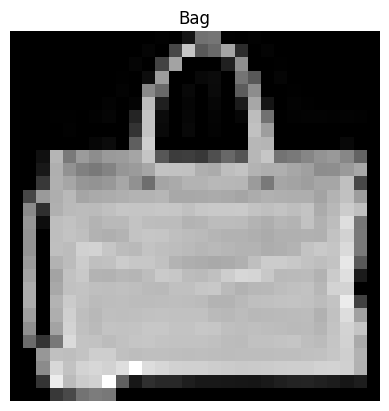

In [62]:
# Show a sample
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

random_image = train_features_batch[random_idx]
random_label = train_labels_batch[random_idx]

plt.imshow(random_image.squeeze(), cmap='gray')
plt.axis('off')
plt.title(class_names[random_label])
print(f'Label: {random_label}, Class: {class_names[random_label]}')
print(f'image shape: {random_image.shape}')


## 3. Model 0 : Build a baseline model

A baseline model is a simple model you try and improve upon with subsequent models/experiments.

In other words: start simply and complexity when necessary



In [63]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f'Shape before flattening: {x.shape}\nShape after flattening: {output.shape}')
#

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [64]:
x.squeeze()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078, 0.0000, 0.0000, 0.0039,
         0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [65]:
from torch import nn
class FasionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [66]:
torch.manual_seed(42)

# Set up the model with input parameters

model_0 = FasionMNISTModelV0(
    input_shape= 784,
    hidden_units= 10,
    output_shape= len(class_names)
)

model_0

FasionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [67]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

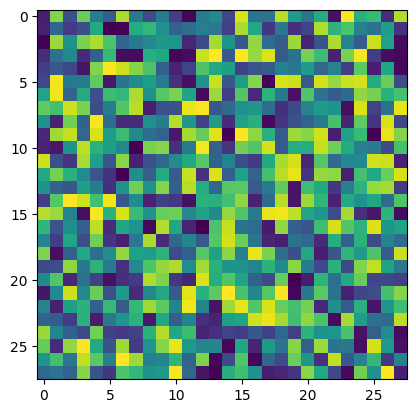

In [68]:
plt.imshow(dummy_x.squeeze())

In [69]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [70]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

# Set up loss, optimizer and evaluation metrics

* Loss Function - nn.CrossEntropyLoss - since working with multi-class data
* Optimizer - 'torch.optim.SGD' - Stochastic Gradient Descent
* Metrics - 'torchmetrics.Accuracy' - Accuracy

In [78]:
import requests
from pathlib import Path

# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists')
  print('Skipping download')
  pass
else:
  print('Downloading helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)
    print('helper_functions.py downloaded')


# Import accuracy metric

from helper_functions import accuracy_fn

# Set up loss
loss_fn = nn.CrossEntropyLoss()

# Set up optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                              lr=0.01)


helper_functions.py already exists
Skipping download
Logits: tensor([[-0.1376,  0.2207,  0.3516,  0.0070,  0.2148,  0.0823,  0.3937,  0.3375,
         -0.2642, -0.1841],
        [ 0.0890,  0.2912,  0.0300, -0.1543,  0.4641,  0.1756,  0.1871,  0.2603,
         -0.0697, -0.2164],
        [-0.2211,  0.3182,  0.2502, -0.2800,  0.2737,  0.1422,  0.4588,  0.2051,
         -0.2011, -0.0064],
        [ 0.0844,  0.2831, -0.0065, -0.1978,  0.4146,  0.2276,  0.2296,  0.1812,
         -0.1274, -0.1940],
        [-0.0167,  0.2944,  0.2939, -0.0198,  0.1879,  0.0866,  0.1893,  0.3645,
         -0.3009, -0.2469]])
Probabilities: tensor([[0.0767, 0.1098, 0.1252, 0.0887, 0.1092, 0.0956, 0.1305, 0.1234, 0.0676,
         0.0733],
        [0.0964, 0.1180, 0.0909, 0.0756, 0.1402, 0.1051, 0.1063, 0.1144, 0.0822,
         0.0710],
        [0.0709, 0.1216, 0.1136, 0.0669, 0.1163, 0.1020, 0.1399, 0.1086, 0.0723,
         0.0879],
        [0.0975, 0.1189, 0.0890, 0.0735, 0.1357, 0.1125, 0.1127, 0.1074, 0.0789,


## 3.2 Creating a function to time our experiments

* Machine learning is very experimental

* Two of the main things you will often want to track are:
  1. Models Performance ( loss and accuracy values etc)
  2. How fast it runs



In [80]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time

start_time = timer()

# some _code

end_time = timer()
print_train_time(start_time, end_time, device)

Train time on cpu: 0.000 seconds


4.7688001359347254e-05

## 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what happened
5. time it all

In [86]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs ( keep them small for faster training time)

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  ## Training
  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
# Training Model
    model_0.train()
    X, y = X.to(device), y.to(device)
    y_pred = model_0(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # Optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()

    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

  train_loss /= len(train_dataloader)
  print(f'Train Loss: {train_loss:.5f}')

  model_0.eval()
  with torch.inference_mode():
    test_loss = 0
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_loss /= len(test_dataloader)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred.argmax(dim=1))
    print(f'Test Loss: {test_loss:.5f}')
    print(f'Test Acc: {test_acc:.5f}')

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(device))





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.40982
Test Loss: 0.00112
Test Acc: 87.50000
Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.40809
Test Loss: 0.00115
Test Acc: 87.50000
Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.40583
Test Loss: 0.00118
Test Acc: 93.75000
Train time on cpu: 37.182 seconds


In [ ]:
# Visualize
plt.figure(figsize=(10,7))
